#### Importing necessary libraries

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import time

In [13]:
def load_boston_data():
    data = load_boston()
    features = np.array(data.data)
    target = np.array(data.target)
    return features,target

In [14]:
def normalizer(features):
    mu = np.mean(features,axis=0)
    std = np.std(features,axis=0)
    return (features-mu)/std

In [15]:
def append_bias(features,target):
    n_samples = features.shape[0]
    n_features = features.shape[1]
    intercept_feature = np.ones((n_samples,1))
    X = np.concatenate((features, intercept_feature),axis=1)
    X = np.reshape(X,[n_samples,n_features+1])
    Y = np.reshape(target,[n_samples,1])
    return X,Y

In [16]:
features, target = load_boston_data()

In [17]:
normalised_features = normalizer(features)

In [18]:
X_input,y_input = append_bias(normalised_features,target)

#### Parameters

In [19]:
NUM_FEATURES = X_input.shape[1]
NUM_CELLS = 30
LEARNING_RATE = 0.005
EPOCHS = 1000
BATCH_SIZE = 30
LOGDIR = ".\graphs"

#### placeholders and weights initialisation

In [20]:
 tf.reset_default_graph() 
X = tf.placeholder(tf.float32,[None, NUM_FEATURES],name='Features')
Y = tf.placeholder(tf.float32,[None, 1],name='Target')
# hidden layer 1
W1 = tf.Variable(tf.truncated_normal([NUM_FEATURES, NUM_CELLS], stddev=0.03), name='Weights_1')
b1 = tf.Variable(tf.truncated_normal([NUM_CELLS]), name='bias_1')
# hidden layer 2
W2 = tf.Variable(tf.truncated_normal([NUM_CELLS, 1], stddev=0.03), name='Weights_2')
b2 = tf.Variable(tf.truncated_normal([1]), name='bias_2')

#### Calculation for loss function and optimizer

In [21]:
cost_tracer = []
hidden_out = tf.nn.relu(tf.add(tf.matmul(X,W1),b1))
pred = tf.nn.relu(tf.add(tf.matmul(hidden_out,W2),b2))
mse = tf.losses.mean_squared_error(Y,pred)
opt = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(mse)
init = tf.global_variables_initializer()

#### Gradient descent learning

In [22]:
start = time.time()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    for i in range(EPOCHS):
        _,mse_out = sess.run([opt,mse],feed_dict={X:X_input,Y:y_input})
        cost_tracer.append(mse_out)
        print("Step :",i," Training Error: ",mse_out)
    writer.close()
    w_hidden, b_hidden = sess.run([W1, b1])
    w_out, b_out = sess.run([W2,b2])
    pred_ = sess.run(pred,{X:X_input})
print("MSE in training:",cost_tracer[-1])      

Step : 0  Training Error:  562.2017
Step : 1  Training Error:  461.29327
Step : 2  Training Error:  365.0117
Step : 3  Training Error:  258.3942
Step : 4  Training Error:  155.04721
Step : 5  Training Error:  82.307594
Step : 6  Training Error:  47.9753
Step : 7  Training Error:  35.466064
Step : 8  Training Error:  30.740393
Step : 9  Training Error:  28.49795
Step : 10  Training Error:  27.13646
Step : 11  Training Error:  26.180014
Step : 12  Training Error:  25.467371
Step : 13  Training Error:  24.918964
Step : 14  Training Error:  24.484745
Step : 15  Training Error:  24.121397
Step : 16  Training Error:  23.827805
Step : 17  Training Error:  23.584206
Step : 18  Training Error:  23.38469
Step : 19  Training Error:  23.218067
Step : 20  Training Error:  23.074514
Step : 21  Training Error:  22.947086
Step : 22  Training Error:  22.832575
Step : 23  Training Error:  22.727734
Step : 24  Training Error:  22.627466
Step : 25  Training Error:  22.535368
Step : 26  Training Error:  22

Step : 311  Training Error:  14.825678
Step : 312  Training Error:  14.809466
Step : 313  Training Error:  14.793501
Step : 314  Training Error:  14.77797
Step : 315  Training Error:  14.762286
Step : 316  Training Error:  14.746082
Step : 317  Training Error:  14.730107
Step : 318  Training Error:  14.714311
Step : 319  Training Error:  14.698735
Step : 320  Training Error:  14.683231
Step : 321  Training Error:  14.667754
Step : 322  Training Error:  14.652647
Step : 323  Training Error:  14.637672
Step : 324  Training Error:  14.623157
Step : 325  Training Error:  14.608852
Step : 326  Training Error:  14.594709
Step : 327  Training Error:  14.580708
Step : 328  Training Error:  14.566886
Step : 329  Training Error:  14.55292
Step : 330  Training Error:  14.539138
Step : 331  Training Error:  14.525463
Step : 332  Training Error:  14.512088
Step : 333  Training Error:  14.498916
Step : 334  Training Error:  14.485789
Step : 335  Training Error:  14.472744
Step : 336  Training Error:

Step : 595  Training Error:  11.955186
Step : 596  Training Error:  11.945473
Step : 597  Training Error:  11.935713
Step : 598  Training Error:  11.925693
Step : 599  Training Error:  11.915765
Step : 600  Training Error:  11.907027
Step : 601  Training Error:  11.897953
Step : 602  Training Error:  11.888597
Step : 603  Training Error:  11.8788595
Step : 604  Training Error:  11.869297
Step : 605  Training Error:  11.859407
Step : 606  Training Error:  11.849958
Step : 607  Training Error:  11.840348
Step : 608  Training Error:  11.830804
Step : 609  Training Error:  11.821713
Step : 610  Training Error:  11.812649
Step : 611  Training Error:  11.803604
Step : 612  Training Error:  11.794524
Step : 613  Training Error:  11.785509
Step : 614  Training Error:  11.776225
Step : 615  Training Error:  11.767205
Step : 616  Training Error:  11.7578745
Step : 617  Training Error:  11.74914
Step : 618  Training Error:  11.739937
Step : 619  Training Error:  11.730907
Step : 620  Training Err

Step : 809  Training Error:  10.19216
Step : 810  Training Error:  10.185126
Step : 811  Training Error:  10.178121
Step : 812  Training Error:  10.171139
Step : 813  Training Error:  10.164032
Step : 814  Training Error:  10.156937
Step : 815  Training Error:  10.15004
Step : 816  Training Error:  10.142671
Step : 817  Training Error:  10.135936
Step : 818  Training Error:  10.128777
Step : 819  Training Error:  10.1218605
Step : 820  Training Error:  10.115148
Step : 821  Training Error:  10.108138
Step : 822  Training Error:  10.1014
Step : 823  Training Error:  10.094549
Step : 824  Training Error:  10.087802
Step : 825  Training Error:  10.081022
Step : 826  Training Error:  10.074198
Step : 827  Training Error:  10.067597
Step : 828  Training Error:  10.060795
Step : 829  Training Error:  10.0540285
Step : 830  Training Error:  10.047463
Step : 831  Training Error:  10.04065
Step : 832  Training Error:  10.034072
Step : 833  Training Error:  10.02741
Step : 834  Training Error:  

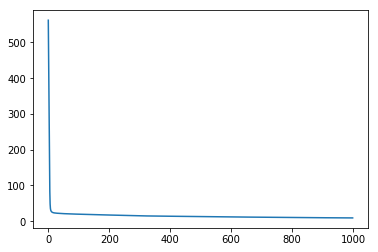

In [23]:
plt.plot(cost_tracer)
plt.show()

In [24]:
%matplotlib inline

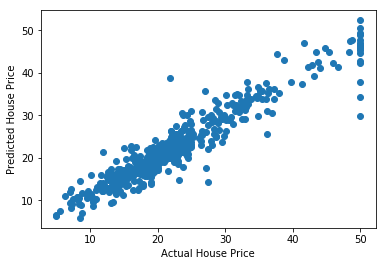

In [25]:
fix,ax = plt.subplots()
plt.scatter(y_input,pred_)
ax.set_xlabel('Actual House Price')
ax.set_ylabel('Predicted House Price')
plt.show()

In [27]:
import seaborn as sns

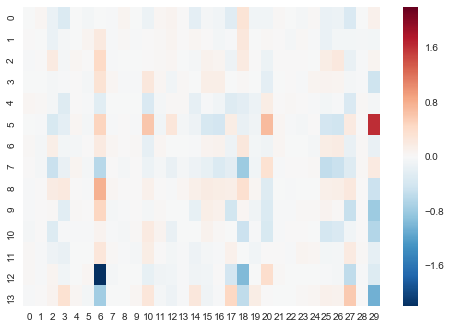

In [32]:
sns.heatmap(w_hidden)

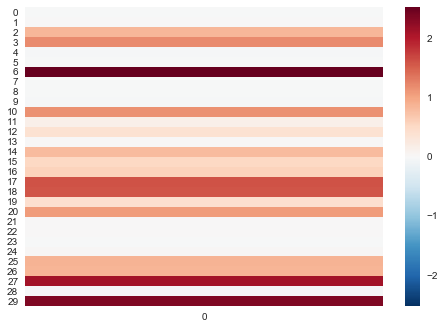

In [33]:
sns.heatmap(w_out)